In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
datos = pd.read_csv('coches.csv')

In [3]:
datos.head()

,combustible,rueda_motriz,distancia_ejes,largo,ancho,altura,peso,motor,caballos,max_revoluciones,precio
0,1,1,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,13495.0
1,1,1,88.6,168.8,64.1,48.8,2548,130,111.0,5000.0,16500.0
2,1,1,94.5,171.2,65.5,52.4,2823,152,154.0,5000.0,16500.0
3,1,2,99.8,176.6,66.2,54.3,2337,109,102.0,5500.0,13950.0
4,1,3,99.4,176.6,66.4,54.3,2824,136,115.0,5500.0,17450.0


In [4]:
print('Hay un total de', np.shape(datos)[0], 'observaciones con', np.shape(datos)[1], 'variables en nuestro conjunto de datos')

Hay un total de 201 observaciones con 11 variables en nuestro conjunto de datos


In [5]:
variables = datos.columns

bin = 0 ; multi = 0

for i in variables:
    if len(datos[i].unique()) == 2:
        bin += 1
    elif len(datos[i].unique()) > 2 and len(datos[i].unique()) <= 4:
        multi += 1

print('Concretamente, encontramos', bin, 'variables binarias,', multi, 'variable multiestado, y las', 
      np.shape(datos)[1] - bin - multi, 'restantes son cuantitativas')

Concretamente, encontramos 1 variables binarias, 1 variable multiestado, y las 9 restantes son cuantitativas


In [6]:
cuantis = []

for i in variables: cuantis.append(i) if len(datos[i].unique()) > 4 else cuantis

In [7]:
medias = []
for i in range(len(cuantis)): medias.append(np.mean(datos[cuantis[i]])) 

## Vector de medias

medias

[98.78905472636815,
 174.09701492537314,
 65.87412935323383,
 53.77412935323383,
 2552.9253731343283,
 126.66666666666667,
 103.23,
 5119.0,
 13223.69]

In [8]:
import math
from scipy.stats import skew

normal = [] ; log = [] ; sqrt = []

for i in cuantis: normal.append(skew(datos[i])) ; log.append(skew(np.log(datos[i]))) ; sqrt.append(skew(np.sqrt(datos[i])))
    
comparar = pd.DataFrame({'normal':normal, 'log':log, 'sqrt':sqrt})

In [9]:
filas = [] ; col = []

for i in range(len(comparar)):
    for j in comparar.columns:
        if abs(comparar)[j][i] == min(abs(comparar).loc[i]):
            filas.append(i) ; col.append(j)
            
final = pd.DataFrame({'fila': filas, 'transf': col})

array([[<AxesSubplot:xlabel='distancia_ejes', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='largo', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='ancho', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='altura', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='peso', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='motor', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='caballos', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='max_revoluciones', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='precio', ylabel='distancia_ejes'>],
       [<AxesSubplot:xlabel='distancia_ejes', ylabel='largo'>,
        <AxesSubplot:xlabel='largo', ylabel='largo'>,
        <AxesSubplot:xlabel='ancho', ylabel='largo'>,
        <AxesSubplot:xlabel='altura', ylabel='largo'>,
        <AxesSubplot:xlabel='peso', ylabel='largo'>,
        <AxesSubplot:xlabel='motor', ylabel='largo'>,
        <AxesSubplot:xlabel='caballos', ylabel='largo'>,
        <AxesSubpl

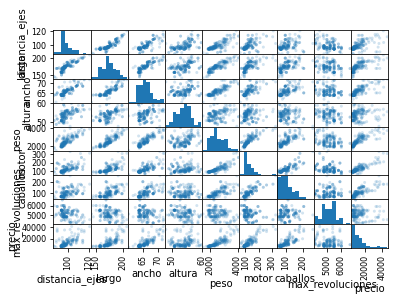

In [10]:
pd.plotting.scatter_matrix(datos[cuantis], alpha = 0.2)

In [11]:
for i in range(len(final)):
    if final['transf'][i] == 'sqrt':
        datos[cuantis[i]] = np.sqrt(datos[cuantis[i]])
    elif final['transf'][i] == 'log':
        datos[cuantis[i]] = np.log(datos[cuantis[i]])

array([[<AxesSubplot:xlabel='distancia_ejes', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='largo', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='ancho', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='altura', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='peso', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='motor', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='caballos', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='max_revoluciones', ylabel='distancia_ejes'>,
        <AxesSubplot:xlabel='precio', ylabel='distancia_ejes'>],
       [<AxesSubplot:xlabel='distancia_ejes', ylabel='largo'>,
        <AxesSubplot:xlabel='largo', ylabel='largo'>,
        <AxesSubplot:xlabel='ancho', ylabel='largo'>,
        <AxesSubplot:xlabel='altura', ylabel='largo'>,
        <AxesSubplot:xlabel='peso', ylabel='largo'>,
        <AxesSubplot:xlabel='motor', ylabel='largo'>,
        <AxesSubplot:xlabel='caballos', ylabel='largo'>,
        <AxesSubpl

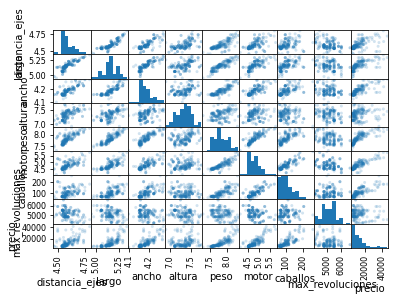

In [12]:
pd.plotting.scatter_matrix(datos[cuantis], alpha = 0.2)

In [13]:
datos_trans = pd.read_csv('coches_new.csv')
medias_trans = []
for i in range(len(cuantis)): medias_trans.append(np.mean(datos_trans[cuantis[i]])) 
medias_trans

[4.5911740164441435,
 5.157094502662543,
 4.187245373247329,
 7.331204791506301,
 7.825309233313315,
 4.79834223931441,
 4.577945737174006,
 8.536315045616977,
 9.350866307355577]

In [14]:
for j in range(len(cuantis)): print(medias[j] - medias_trans[j])

94.19788070992401
168.9399204227106
61.6868839799865
46.44292456172753
2545.100063901015
121.86832442735226
98.652054262826
5110.463684954383
13214.339133692645


In [15]:
datos_trans.shape

(201, 11)

In [16]:
gas = datos_trans[datos_trans['combustible'] == 1].shape[0]
diesel = datos_trans.shape[0] - gas

print('Hay un total de', gas, 'vehículos que funcionan con gasolina y los', diesel, 'restantes con diesel')

Hay un total de 181 vehículos que funcionan con gasolina y los 20 restantes con diesel


In [17]:
trasera = datos_trans[datos_trans['rueda_motriz'] == 1].shape[0]
delantera = datos_trans[datos_trans['rueda_motriz'] == 2].shape[0]
todo = 201 - trasera - delantera

print('Hay un total de', trasera, 'vehículos con tracción trasera,', delantera, 'con tracción delantera y los restantes', todo, 'son 4x4')

Hay un total de 75 vehículos con tracción trasera, 118 con tracción delantera y los restantes 8 son 4x4
